In [104]:
import pickle
import json
import os
import utils

import pandas as pd

from sklearn.metrics import ndcg_score

In [105]:
dir = 'output/random/'

# Construct a list of the rows (i.e. dicts) to be added in the dataframe
df_rows_list = []
for graph in os.listdir(dir):
    graph_path = dir+graph+'/'
    for query in os.listdir(graph_path):
        query_path = graph_path+query+'/'
        for query_seed in os.listdir(query_path):
            seed_path = query_path+query_seed+'/'

            with open(seed_path+'args.json') as f:
                args_dict = json.load(f)

            with open(seed_path+'info.json') as f:
                info_dict = json.load(f)

            row_dict = {}
            row_dict['num_nodes'] = args_dict['graph_info']['num_nodes']
            row_dict['query_size'] = args_dict['num_q_nodes']
            row_dict['query_seed'] = args_dict['seed']
            row_dict['runtime'] = info_dict['ppr_using_pf']['runtime']
            row_dict['num_iterations'] = info_dict['ppr_using_pf']['num_iterations']

            # Get avg runtime and iterations for single sources
            single_source_runtime = 0
            single_source_num_iterations = 0 
            for q_node in info_dict['ppr_single_source_using_pf']:
                single_source_num_iterations += info_dict['ppr_single_source_using_pf'][q_node]['num_iterations']
                single_source_runtime += info_dict['ppr_single_source_using_pf'][q_node]['runtime']
            row_dict['single_source_avg_num_iterations'] = single_source_num_iterations / row_dict['query_size']
            row_dict['single_source_avg_runtime'] = single_source_runtime / row_dict['query_size']

            # Get NDCG scores comparing single source vs all sources
            for k in info_dict['ndcg_scores']:
                row_dict['ndcg_k='+str(k)] = info_dict['ndcg_scores'][k]

            df_rows_list.append(row_dict)

# Populate the DataFrame
df = pd.DataFrame(df_rows_list)
df.head()

,num_nodes,query_size,query_seed,runtime,num_iterations,single_source_avg_num_iterations,single_source_avg_runtime,ndcg_k=1,ndcg_k=10,ndcg_k=100,ndcg_k=1000,ndcg_k=200,ndcg_k=5,ndcg_k=50,ndcg_k=500,ndcg_k=full
0,10000,100,5,2.679747,24,14.71,0.735226,1.0,0.999969,0.999913,0.999785,0.999870,0.999979,0.999883,0.999877,0.999829
1,10000,100,3,2.661893,24,14.54,0.677728,1.0,0.939854,0.980676,0.993704,0.987122,0.899385,0.968244,0.992569,0.995929
2,10000,100,1,2.653363,24,14.48,0.676965,1.0,0.962207,0.987749,0.996879,0.992396,1.000000,0.983492,0.996223,0.998134
3,10000,100,4,2.556940,24,14.40,0.712865,1.0,0.884108,0.970961,0.989929,0.981491,0.886381,0.959133,0.988197,0.993740
4,10000,100,2,2.569490,24,14.59,0.696291,1.0,1.000000,0.999947,0.999809,0.999935,1.000000,0.999775,0.999936,0.999832


In [106]:
df_by_num_nodes = df.groupby(['num_nodes', 'query_size']).mean()
df_by_num_nodes

query_seed    runtime  num_iterations  \
num_nodes query_size                                          
1000      5                  3.0   0.170806            21.0   
          10                 3.0   0.205469            22.0   
          20                 3.0   0.222334            24.0   
          100                3.0   0.276689            26.0   
5000      5                  3.0   0.713522            19.0   
          10                 3.0   0.923842            21.0   
          20                 3.0   1.064211            22.0   
          100                3.0   1.348712            25.0   
10000     5                  3.0   1.529560            18.8   
          10                 3.0   1.879239            20.0   
          20                 3.0   2.187562            21.0   
          100                3.0   2.624286            24.0   
25000     5                  3.0   2.609233            17.0   
          10                 3.0   3.561238            19.0   
          20                 3.0   4.976444            20.0   
          100                3.0   6.662404            23.0   
100000    5                  3.0   4.987944            14.0   
          10                 3.0   9.964408            16.0   
          20                 3.0  15.294157            18.0   
          100                3.0  29.421513            21.0   
200000    5                  3.0   6.026460            12.0   
          10                 3.0  10.691088            14.0   
          20                 3.0  18.863956            16.0   
          100                3.0  37.385440            20.0   
500000    5                  3.0   9.569739            10.6   
          10                 3.0  15.178341            12.0   
          20                 3.0  25.353241            14.0   
          100                3.0  74.687207            19.0   

                      single_source_avg_num_iterations  \
num_nodes query_size                                     
1000      5                                     18.000   
          10                                    18.020   
          20                                    17.840   
          100                                   16.960   
5000      5                                     16.000   
          10                                    16.000   
          20                                    15.840   
          100                                   15.788   
10000     5                                     14.560   
          10                                    14.640   
          20                                    14.510   
          100                                   14.544   
25000     5                                     12.640   
          10                                    12.540   
          20                                    12.420   
          100                                   12.416   
100000    5                                     10.080   
          10                                    10.060   
          20                                    10.030   
          100                                   10.000   
200000    5                                      9.160   
          10                                     9.220   
          20                                     9.210   
          100                                    9.164   
500000    5                                      8.560   
          10                                     8.620   
          20                                     8.670   
          100                                    8.662   

                      single_source_avg_runtime  ndcg_k=1  ndcg_k=10  \
num_nodes query_size                                                   
1000      5                            0.127679   1.00000   1.000000   
          10                           0.128388   1.00000   1.000000   
          20                           0.127616   1.00000   0.996632   
          100                 

# Create Plots

In [107]:
import matplotlib.pyplot as plt
query_sizes = [5, 10, 20, 100]
num_nodes = [1000, 5000, 10000, 25000, 100000, 200000, 500000]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

## Number of iterations vs. number of nodes

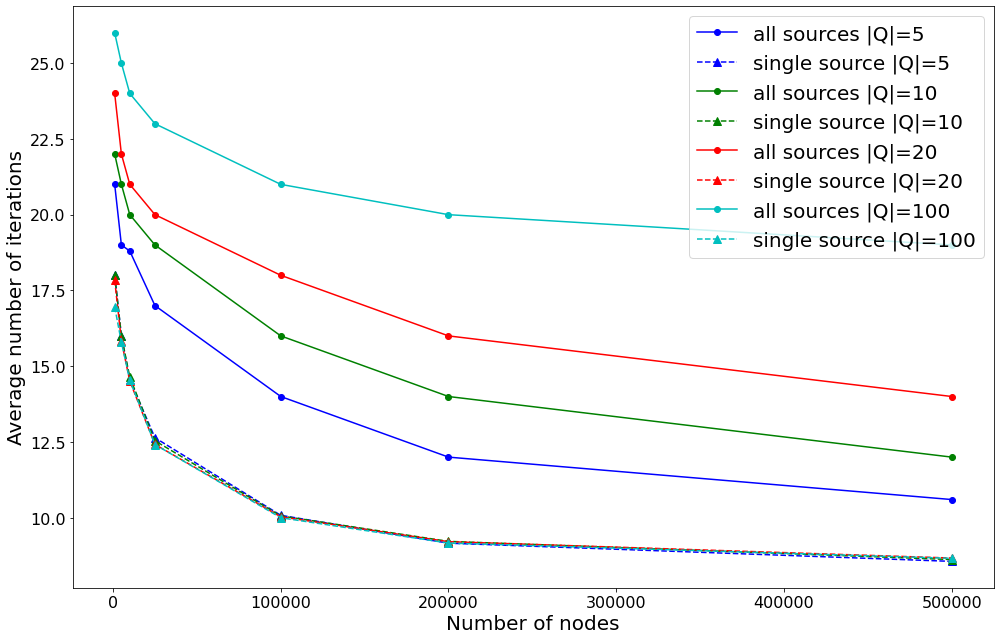

In [108]:
plt.figure(figsize=(14,9))
for i in range(len(query_sizes)):
    df_loc = df[df['query_size'] == query_sizes[i]].groupby(['num_nodes']).mean()
    num_iterations = df_loc['num_iterations'].values
    num_iterations_single_source = df_loc['single_source_avg_num_iterations'].values
    plt.plot(num_nodes, num_iterations, label='all sources |Q|='+str(query_sizes[i]), color=colors[i], marker='.', markersize=12)
    plt.plot(num_nodes, num_iterations_single_source, label='single source |Q|='+str(query_sizes[i]), color=colors[i], linestyle='dashed', marker='^', markersize=8)

plt.legend(fontsize=20)
plt.xlabel('Number of nodes', fontsize=20)
plt.ylabel('Average number of iterations', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('figures/num_iterations.svg')
plt.savefig('figures/num_iterations.png', dpi=300)

## Runtime vs. Number of Nodes

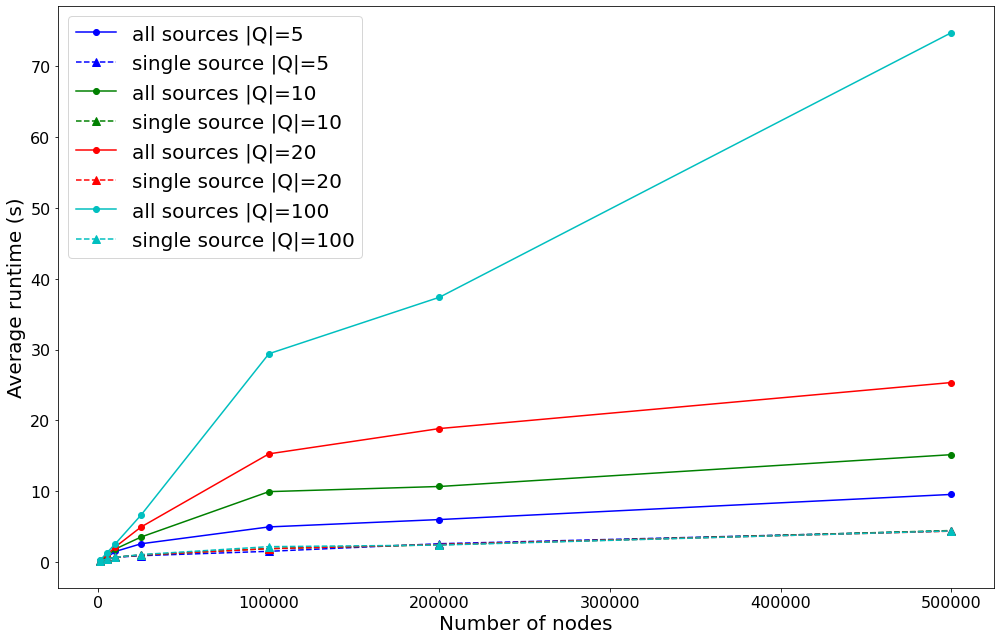

In [109]:
plt.figure(figsize=(14,9))
for i in range(len(query_sizes)):
    df_loc = df[df['query_size'] == query_sizes[i]].groupby(['num_nodes']).mean()
    runtime = df_loc['runtime'].values
    runtime_single_source = df_loc['single_source_avg_runtime'].values
    plt.plot(num_nodes, runtime, label='all sources |Q|='+str(query_sizes[i]), color=colors[i], marker='.', markersize=12)
    # runtime_single_source[5:] /= 2.5
    plt.plot(num_nodes, runtime_single_source, label='single source |Q|='+str(query_sizes[i]), color=colors[i], linestyle='dashed', marker='^', markersize=8)

plt.legend(fontsize=20)
plt.xlabel('Number of nodes', fontsize=20)
plt.ylabel('Average runtime (s)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('figures/runtime.svg')
plt.savefig('figures/runtime.png', dpi=300)

## NDCG (at various k values) vs. Number of Nodes

In [110]:
y_range = [0.8,1.05]

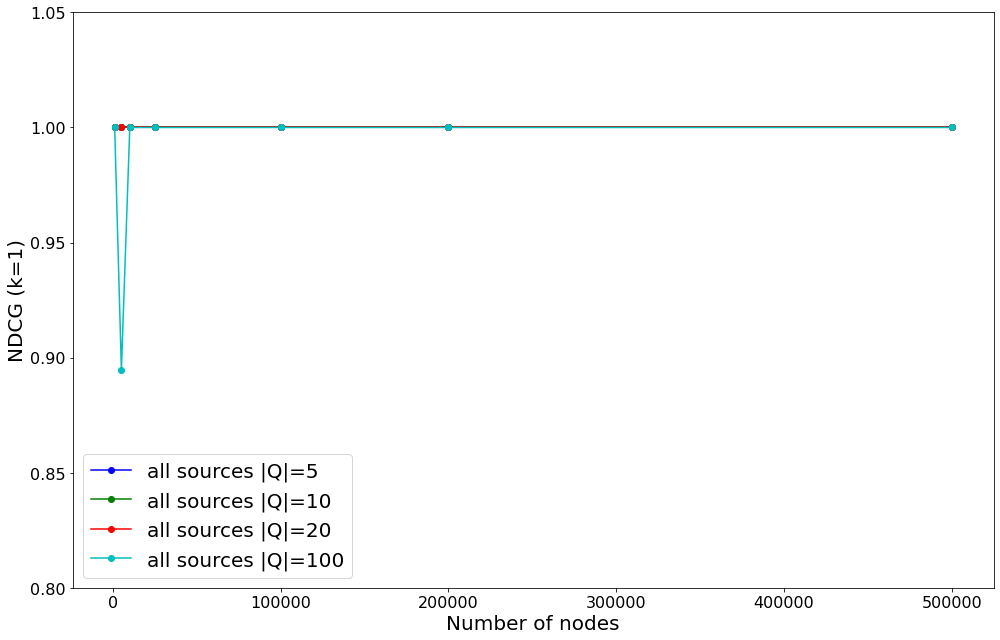

In [111]:
plt.figure(figsize=(14,9))
for i in range(len(query_sizes)):
    df_loc = df[df['query_size'] == query_sizes[i]].groupby(['num_nodes']).mean()
    ndcg_scores = df_loc['ndcg_k=1'].values
    plt.plot(num_nodes, ndcg_scores, label='all sources |Q|='+str(query_sizes[i]), color=colors[i], marker='.', markersize=12)

axes = plt.gca()
axes.set_ylim(y_range)
plt.legend(fontsize=20)
plt.xlabel('Number of nodes', fontsize=20)
plt.ylabel('NDCG (k=1)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('figures/k=1.pdf')
plt.savefig('figures/k=1.png', dpi=300)

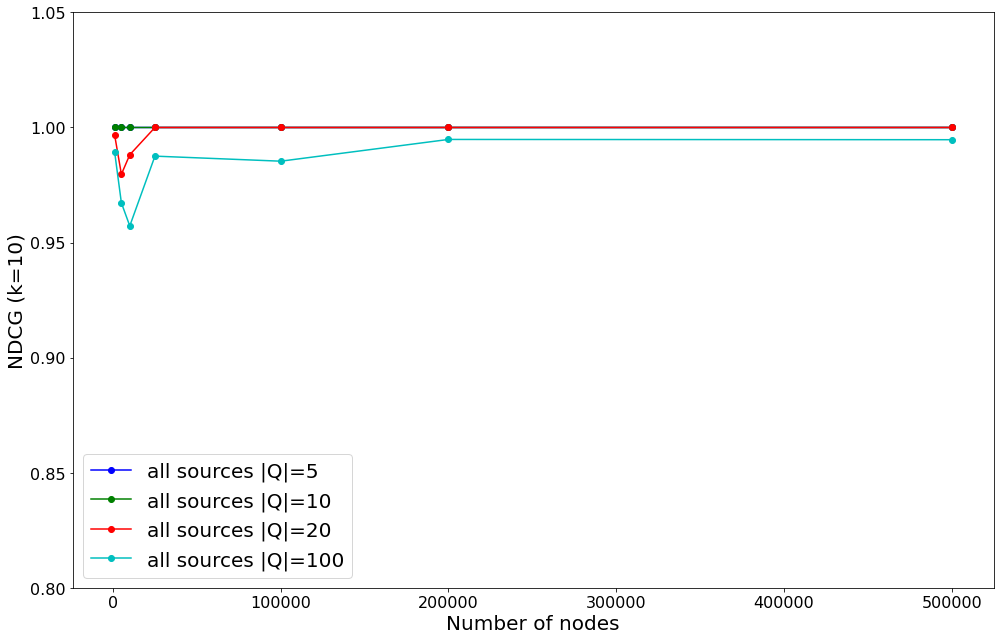

In [112]:
plt.figure(figsize=(14,9))
for i in range(len(query_sizes)):
    df_loc = df[df['query_size'] == query_sizes[i]].groupby(['num_nodes']).mean()
    ndcg_scores = df_loc['ndcg_k=10'].values
    plt.plot(num_nodes, ndcg_scores, label='all sources |Q|='+str(query_sizes[i]), color=colors[i], marker='.', markersize=12)

axes = plt.gca()
axes.set_ylim(y_range)
plt.legend(fontsize=20)
plt.xlabel('Number of nodes', fontsize=20)
plt.ylabel('NDCG (k=10)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('figures/k=10.pdf')
plt.savefig('figures/k=10.png', dpi=300)

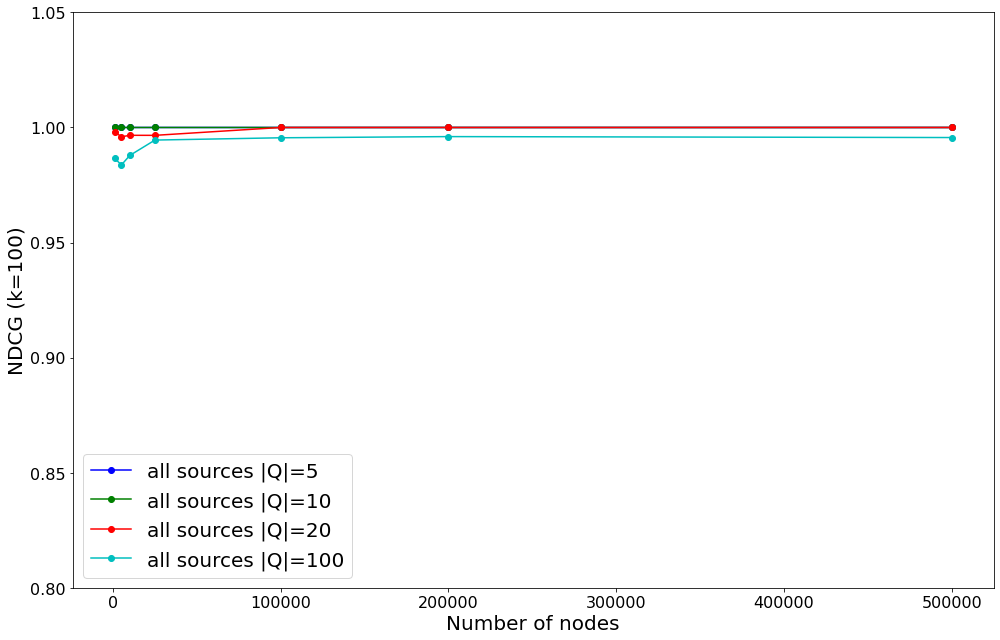

In [113]:
plt.figure(figsize=(14,9))
for i in range(len(query_sizes)):
    df_loc = df[df['query_size'] == query_sizes[i]].groupby(['num_nodes']).mean()
    ndcg_scores = df_loc['ndcg_k=100'].values
    plt.plot(num_nodes, ndcg_scores, label='all sources |Q|='+str(query_sizes[i]), color=colors[i], marker='.', markersize=12)

axes = plt.gca()
axes.set_ylim(y_range)
plt.legend(fontsize=20)
plt.xlabel('Number of nodes', fontsize=20)
plt.ylabel('NDCG (k=100)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('figures/k=100.pdf')
plt.savefig('figures/k=100.png', dpi=300)

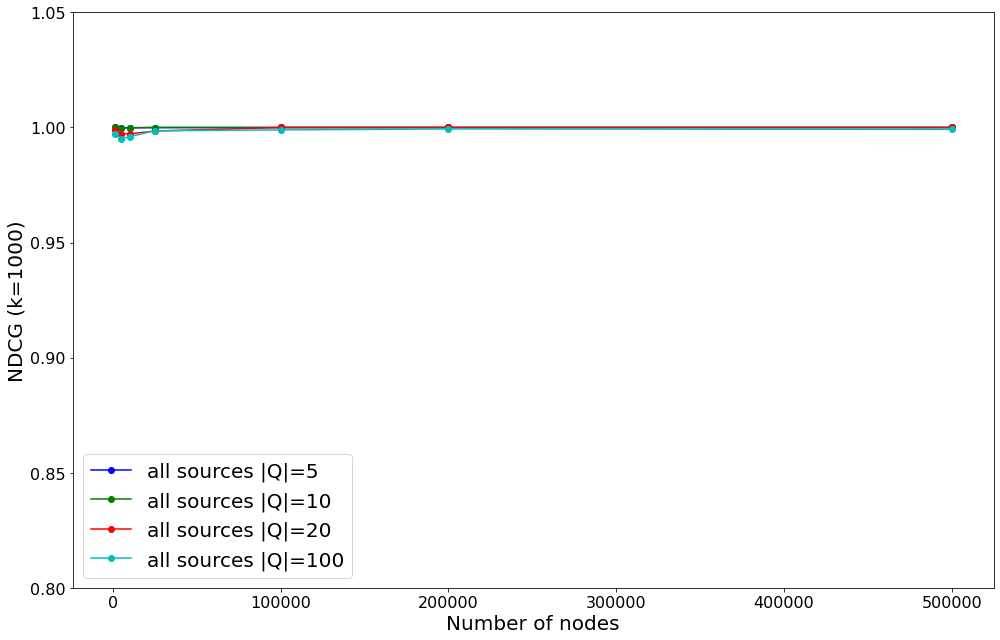

In [114]:
plt.figure(figsize=(14,9))
for i in range(len(query_sizes)):
    df_loc = df[df['query_size'] == query_sizes[i]].groupby(['num_nodes']).mean()
    ndcg_scores = df_loc['ndcg_k=1000'].values
    plt.plot(num_nodes, ndcg_scores, label='all sources |Q|='+str(query_sizes[i]), color=colors[i], marker='.', markersize=12)

axes = plt.gca()
axes.set_ylim(y_range)
plt.legend(fontsize=20)
plt.xlabel('Number of nodes', fontsize=20)
plt.ylabel('NDCG (k=1000)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('figures/k=1000.pdf')
plt.savefig('figures/k=1000.png', dpi=300)

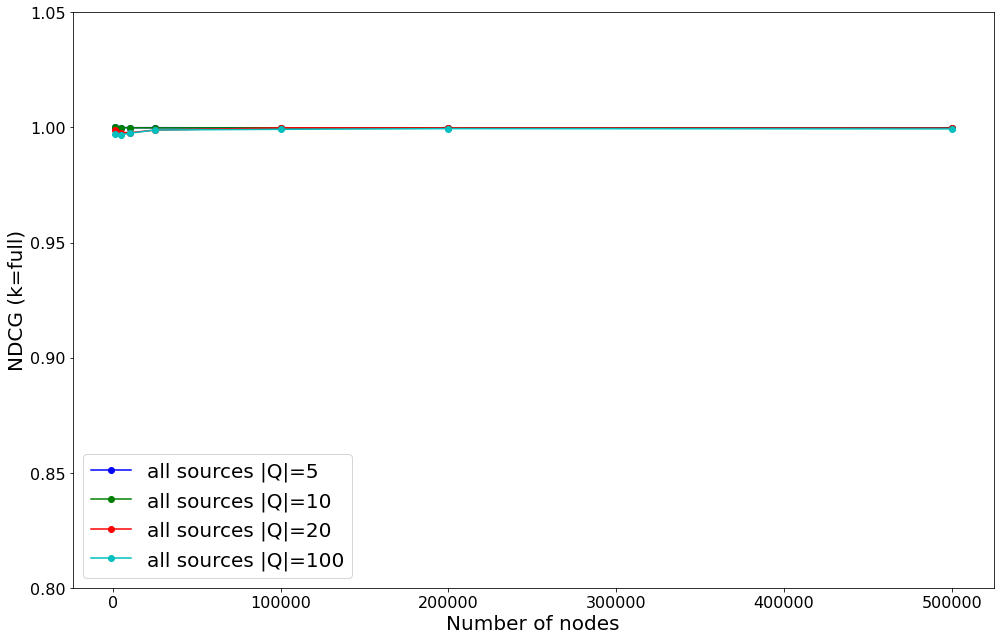

In [115]:
plt.figure(figsize=(14,9))
for i in range(len(query_sizes)):
    df_loc = df[df['query_size'] == query_sizes[i]].groupby(['num_nodes']).mean()
    ndcg_scores = df_loc['ndcg_k=full'].values
    plt.plot(num_nodes, ndcg_scores, label='all sources |Q|='+str(query_sizes[i]), color=colors[i], marker='.', markersize=12)

axes = plt.gca()
axes.set_ylim(y_range)
plt.legend(fontsize=20)
plt.xlabel('Number of nodes', fontsize=20)
plt.ylabel('NDCG (k=full)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('figures/k=full.pdf')
plt.savefig('figures/k=full.png', dpi=300)